In [90]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import json
np.random.seed(0)
ROOT = Path("")

In [13]:
# df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet/all_results_resnet_df.csv")
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/all_results.csv", index_col=0)

In [4]:
len(df)

188340

In [14]:
df.head()

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_a17ed_00710_710_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.0010,0.9,sgd,0.0001,674695,0.067,0.979,0.378464,0.3051
1,NN_tune_trainable_a17ed_00686_686_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,relu,0.0001,0.9,adam,0.0001,486815,0.054,0.984,0.056045,0.8454
2,NN_tune_trainable_a17ed_01002_1002_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0001,0.9,sgd,0.0001,162638,2.301,0.113,0.230108,0.1135
3,NN_tune_trainable_a17ed_00775_775_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.5,kaiming_normal,tanh,0.0010,0.9,adam,0.0010,651635,0.134,0.960,0.296555,0.2168
4,NN_tune_trainable_a17ed_01098_1098_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0010,0.9,sgd,0.0010,361619,2.301,0.113,0.230111,0.1135


In [4]:
df = df[df.dataset == "CIFAR10"]
df = df[df.attack == "PGD"]
df = df[df.eps == 0.1]

In [5]:
df

,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_0ecbc_00414_414_seed=415_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,415,0.303,0.921,0.019875,0.2643
1,NN_tune_trainable_0ecbc_00977_977_seed=978_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,978,0.295,0.925,0.019699,0.2545
2,NN_tune_trainable_0ecbc_00214_214_seed=215_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,215,0.300,0.922,0.020788,0.2602
3,NN_tune_trainable_0ecbc_00594_594_seed=595_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,595,0.307,0.920,0.020801,0.2537
4,NN_tune_trainable_0ecbc_00444_444_seed=445_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,445,0.310,0.920,0.019009,0.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NN_tune_trainable_0ecbc_00668_668_seed=669_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,669,0.303,0.920,0.020186,0.2611
996,NN_tune_trainable_0ecbc_00451_451_seed=452_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,452,0.308,0.921,0.020184,0.2589
997,NN_tune_trainable_0ecbc_00532_532_seed=533_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,533,0.312,0.919,0.020632,0.2533
998,NN_tune_trainable_0ecbc_00274_274_seed=275_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,275,0.302,0.922,0.018963,0.2723


In [6]:
l = df.name.tolist()

In [8]:
df[df.name==l[0]].iloc[0,1]

'CIFAR10'

<Axes: >

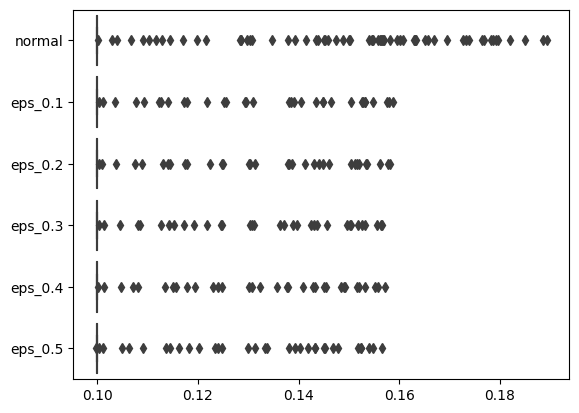

In [6]:
eps = [.1, .2, .3, .4, .5]

aux_df = df[(df.dataset == "CIFAR10") & (df.attack == "PGD") & (df.setup == "hyp-10-r")]
both_results = pd.DataFrame()

for i, e in enumerate(eps):

    eps_df = aux_df[aux_df.eps == e].sort_values(by="name").reset_index(drop=True)

    both_results["normal"] = eps_df["old_acc"]
    both_results[f"eps_{e}"] = eps_df["new_acc"]

# sns.displot(data=both_results[["normal", "eps_0.1"]], kde=True)
sns.boxplot(both_results, orient="h")

In [8]:
both_results.normal.value_counts()

0.1000    1143
0.1546       1
0.1144       1
0.1651       1
0.1564       1
          ... 
0.1631       1
0.1285       1
0.1632       1
0.1582       1
0.1283       1
Name: normal, Length: 67, dtype: int64

In [8]:
df.new_acc.value_counts()

0.195874    58607
0.100000    33482
0.113500    22837
0.066994     6284
0.097400     4077
            ...  
0.338500        1
0.716200        1
0.479900        1
0.228800        1
0.133835        1
Name: new_acc, Length: 13536, dtype: int64

In [27]:
df[df.old_acc=="(0.92,)"]

,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
15,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019619,0.2724
21,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.018843,0.2733
73,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.018729,0.2670
74,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.020664,0.2544
115,NN_tune_trainable_0ecbc_00488_488_seed=489_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,489,0.303,"(0.92,)",0.020058,0.2585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,NN_tune_trainable_0ecbc_00118_118_seed=119_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,119,0.311,"(0.92,)",0.021218,0.2081
9812,NN_tune_trainable_0ecbc_00380_380_seed=381_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,381,0.309,"(0.92,)",0.019995,0.2226
9839,NN_tune_trainable_0ecbc_00321_321_seed=322_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,322,0.308,"(0.92,)",0.020388,0.2267
9863,NN_tune_trainable_0ecbc_00980_980_seed=981_202...,CIFAR10,FGSM,0.5,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,981,0.303,"(0.92,)",0.019261,0.2319


In [29]:
df[df.old_acc=="(0.92,)"].iloc[0, 13]

AttributeError: 'str' object has no attribute 'dtype'

In [40]:
s = '0.7,'
s[:-1]

'0.7'

In [36]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].startswith("("):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][1:5]

In [41]:
for i in range(len(df)):
    if isinstance(df.loc[i, "old_acc"], str):
        if df.loc[i, "old_acc"].endswith(","):
            df.loc[i, "old_acc"] = df.loc[i, "old_acc"][:-1]

In [43]:
df = df.astype({"old_acc": "float64"})

In [44]:
df.to_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet/all_results_resnet_df.csv", index=False)
        

In [49]:
def return_names_for_path(dataset, setup):
    if dataset=="CIFAR10":
        size = "large"
    else:
        size = "small"
    
    if setup == "seed":
        zoo_p = f"cnn_{size}_{dataset.lower()}_ard"
    elif setup == "hyp-10-f":
        zoo_p = f"cnn_{size}_{dataset.lower()}_fixed_ard"
    else: 
        zoo_p = f"cnn_{size}_{dataset.lower()}_rand_ard"

    return zoo_p

In [50]:
results_root = os.path.join(ROOT, "/netscratch2/jlautz/model_robustness/src/model_robustness/data/resnet")

In [51]:
df = pd.read_csv(os.path.join(results_root, "all_results_resnet_df.csv"))

In [70]:
kendall_df = pd.DataFrame(columns=["ds", "attack", "kendalls_tau", "p-value"])
datasets = ["CIFAR10", "CIFAR100", "TinyImageNet"]
for i, ds in enumerate(datasets):
    
    aux_df = df[(df.dataset==ds) & (df.attack=="PGD") & (df.eps==0.1)]
    aux_df[["name", "old_acc", "new_acc"]]
    
    perturbed_df = aux_df.sort_values("new_acc", ascending=False)
    aux_df = aux_df.sort_values("old_acc", ascending=False)
    
    perturbed_df.insert(0, "order", range(1, 1+len(perturbed_df)))
    aux_df.insert(0, "order", range(1, 1+len(aux_df)))
    
    # Sort perturbed_df according to names of aux_df again
    aux_list = list(aux_df.name)
    perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: aux_list.index(e)), inplace=True)

    
    # Calculating kendall's tau
    tau, p_value = stats.kendalltau(aux_df["order"], perturbed_df["order"])
    print(f"Tau-value: {tau}, p-value: {p_value}")
    kendall_df.loc[i, "ds"] = ds
    kendall_df.loc[i, "attack"] = "PGD"
    kendall_df.loc[i, "kendalls_tau"] = tau
    kendall_df.loc[i, "p-value"] = p_value

Tau-value: -0.04207007007007007, p-value: 0.04636315021175537
Tau-value: 0.0042922922922922924, p-value: 0.8389430917356812
Tau-value: 0.012272563546884298, p-value: 0.5605695208691802


In [71]:
kendall_df

,ds,attack,kendalls_tau,p-value
0,CIFAR10,PGD,-0.04207,0.046363
1,CIFAR100,PGD,0.004292,0.838943
2,TinyImageNet,PGD,0.012273,0.56057


In [69]:
aux_df.head()

,order,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
572,1,NN_tune_trainable_0ecbc_00676_676_seed=677_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,677,0.291,0.926,0.019661,0.2603
403,2,NN_tune_trainable_0ecbc_00493_493_seed=494_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,494,0.295,0.926,0.019534,0.2625
846,3,NN_tune_trainable_0ecbc_00792_792_seed=793_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,793,0.297,0.926,0.020993,0.2485
22,4,NN_tune_trainable_0ecbc_00039_39_seed=40_2022-...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,40,0.306,0.926,0.020406,0.2677
577,5,NN_tune_trainable_0ecbc_00388_388_seed=389_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,389,0.300,0.925,0.019300,0.2778


In [18]:
df = pd.read_csv("../../results/transferability/dataframes/CIFAR10_hyp-10-f_df.csv", index_col=0)

In [19]:
df

,acc_avg,loss_avg,n_models,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,trial_id,experiment_id,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,config/best_model_path,config/checkpoint_path,config/experiment,config/path_list,logdir
0,0.702300,0.087755,1,2.882510,False,NaN,NaN,1,1ecf5_00000,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,2.882510,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,normal,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
1,0.225200,0.251128,1,2.449597,False,NaN,NaN,1,1ecf5_00001,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,2.449597,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,white_box,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
2,0.138555,0.226433,20,36.225797,False,NaN,NaN,1,1ecf5_00002,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,36.225797,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_1,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
3,0.214815,0.208114,20,37.351231,False,NaN,NaN,1,1ecf5_00003,72b01bd5628b4e5f8a825623f317a0cf,...,172.17.0.3,37.351231,0,1,0.009224,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_2,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
4,0.234942,85596.933761,60,106.997857,False,NaN,NaN,1,1ecf5_00005,808eba129f6c444d9517795c40679422,...,172.17.0.3,106.997857,0,1,0.010045,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_4,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...
5,0.234262,6025.888139,60,107.137619,False,NaN,NaN,1,1ecf5_00006,808eba129f6c444d9517795c40679422,...,172.17.0.3,107.137619,0,1,0.010045,NN_tune_trainable_143c9_00090_90_model::dropou...,/ds2/model_zoos/zoos_v2/CIFAR10/large/tune_zoo...,black_box_5,['NN_tune_trainable_143c9_00215_215_model::dro...,/home/jlautz/ray_results/transferability_exper...


In [20]:
l = []
for p in os.listdir("../../results/transferability/dataframes"):
    l.append(p)

In [21]:
l

['CIFAR10_hyp-10-r_df.csv',
 'CIFAR10_seed_df.csv',
 'MNIST_hyp-10-f_df.csv',
 'MNIST_seed_df.csv',
 'SVHN_hyp-10-r_df.csv',
 'SVHN_seed_df.csv',
 'SVHN_hyp-10-f_df.csv',
 'MNIST_hyp-10-r_df.csv',
 'CIFAR10_hyp-10-f_df.csv']

In [60]:
df = pd.read_csv(os.path.join("../../results/transferability/dataframes", l[6]), index_col=0)

In [61]:
df

,acc_avg,loss_avg,n_models,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,trial_id,experiment_id,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,config/best_model_path,config/checkpoint_path,config/experiment,config/path_list,logdir
0,0.852412,0.050289,1,5.117289,False,NaN,NaN,1,b232d_00000,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,5.117289,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,normal,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
1,0.046174,0.814661,1,4.660588,False,NaN,NaN,1,b232d_00001,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,4.660588,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,white_box,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
2,0.287052,0.213254,20,76.468439,False,NaN,NaN,1,b232d_00002,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,76.468439,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_1,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
3,0.235574,0.237216,20,80.181025,False,NaN,NaN,1,b232d_00003,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,80.181025,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_2,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
4,0.284306,0.234196,20,80.085954,False,NaN,NaN,1,b232d_00004,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,80.085954,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_3,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
5,0.223251,0.232795,30,118.115328,False,NaN,NaN,1,b232d_00005,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,118.115328,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_4,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...
6,0.300898,0.244075,30,118.779482,False,NaN,NaN,1,b232d_00006,12d0f7a751714e1d980d649b77b644e8,...,172.17.0.3,118.779482,0,1,0.01439,NN_tune_trainable_88eea_02658_2658_model::drop...,/ds2/model_zoos/zoos_v2/SVHN/tune_zoo_svhn_hyp...,black_box_5,['NN_tune_trainable_88eea_00467_467_model::dro...,/home/jlautz/ray_results/transferability_exper...


In [43]:
df.loc[0, "config/best_model_path"]

'NN_tune_trainable_40c41_01625_1625_model::dropout=0.5,model::init_type=normal,model::nlin=gelu,optim::lr=0.01,optim::wd=0.1,seed=5_2021-08-15_09-20-21'

In [76]:
import torch
zoo = torch.load("/ds2/model_zoos/zoos_resnet/zoos/CIFAR100/resnet18/kaiming_uniform/analysis.pt")

FileNotFoundError: [Errno 2] No such file or directory: '/ds2/model_zoos/zoos_resnet/zoos/CIFAR100/resnet18/kaiming_uniform/analysis.pt'

In [65]:
# Get only the results from the 50th epoch for each model
a = 0
index_list = [50]
path_list = []
for i in range(len(zoo["paths"])):
    if i == 0:
        aux = zoo["paths"][i]
        path_list.append(zoo["paths"][i])

    if zoo["paths"][i] == aux:
        pass
    else:
        a += 1
        index_list.append(i+50)
        aux = zoo["paths"][i]
        path_list.append(aux)

for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]

# Get all accuracies
acc_list = []
for index in index_list:
    acc_list.append(zoo["acc"][index])

# Get the index of max element
max_index = acc_list.index(max(acc_list))

# Get the corresponding model name
best_model_path = path_list[max_index]

In [66]:
acc_list.index(max(acc_list))

4029

In [74]:
acc_list[4030]

0.8510679164105716

In [70]:
path_list[4030]

'NN_tune_trainable_40c41_04098_4098_model::dropout=0.0,model::init_type=kaiming_uniform,model::nlin=relu,optim::lr=0.001,optim::wd=_2021-08-23_12-13-08'

In [71]:
len(acc_list)

4320

In [72]:
len(path_list)

4320

In [73]:
path_list[-10:]

['NN_tune_trainable_40c41_00549_549_model::dropout=0.0,model::init_type=kaiming_normal,model::nlin=relu,optim::lr=0.0001,optim::wd=0_2021-08-12_04-23-07',
 'NN_tune_trainable_40c41_01387_1387_model::dropout=0.3,model::init_type=kaiming_uniform,model::nlin=gelu,optim::lr=0.001,optim::wd=_2021-08-14_18-57-32',
 'NN_tune_trainable_40c41_01915_1915_model::dropout=0.3,model::init_type=kaiming_uniform,model::nlin=gelu,optim::lr=0.01,optim::wd=0_2021-08-16_06-50-37',
 'NN_tune_trainable_40c41_02824_2824_model::dropout=0.3,model::init_type=normal,model::nlin=gelu,optim::lr=0.001,optim::wd=0.001,see_2021-08-19_08-11-08',
 'NN_tune_trainable_40c41_01707_1707_model::dropout=0.0,model::init_type=normal,model::nlin=sigmoid,optim::lr=0.0001,optim::wd=0.1,s_2021-08-15_19-15-57',
 'NN_tune_trainable_40c41_00202_202_model::dropout=0.3,model::init_type=kaiming_normal,model::nlin=tanh,optim::lr=0.001,optim::wd=0._2021-08-11_00-16-45',
 'NN_tune_trainable_40c41_02266_2266_model::dropout=0.3,model::init_ty

In [92]:
path_list = []
max_index = None
best_model_path = None 
best_acc = 0.0
counter = 0

checkpoint_path = "/ds2/model_zoos/zoos_resnet/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform"
        
for d in os.listdir(checkpoint_path):
    if d.startswith("NN_tune_trainable"):
        path_list.append(d)
        checkpoints = []
        for p in os.listdir(os.path.join(checkpoint_path, d)):
            if p.startswith("checkpoint"):
                checkpoints.append(p)
        checkpoints.sort()

        for i, line in enumerate(open(os.path.join(checkpoint_path, d, "result.json"), "r")):
            if i == len(checkpoints)-1:
                aux_dic = json.loads(line)
                if aux_dic["test_acc"] > best_acc:
                    best_acc = aux_dic["test_acc"]
                    best_model_path = d
                    max_index = counter
        counter += 1
    break

In [96]:
df = pd.read_csv("../../data/all_results.csv", index_col=0)
df = df[(df.dataset=="MNIST") & (df.setup=="hyp-10-f") & (df.attack=="PGD") & (df.eps==0.1)]

In [99]:
model_paths=df["name"].tolist()
root_path="/ds2/model_zoos/zoos_v2/MNIST/tune_zoo_mnist_hyperparameter_10_fixed_seeds"

In [112]:
# Rank models according to the decreasing validation accuracy
# Iterate through the model_paths and get their validation accuracy
ranked = pd.DataFrame(columns=["name", "val_acc", "last_checkpoint"])
for k, path in enumerate(model_paths):
    # take last checkpoint
    checkpoints = []
    for p in os.listdir(os.path.join(root_path, path)):
        if p.startswith("checkpoint"):
            checkpoints.append(p)
    checkpoints.sort()
    for l, line in enumerate(open(os.path.join(root_path, path, "result.json"), "r")):

        if l == len(checkpoints)-1:
            aux_dic = json.loads(line)
            ranked.loc[k, "name"] = path
            ranked.loc[k, "val_acc"] = aux_dic["validation_acc"]
            ranked.loc[k, "last_checkpoint"] = checkpoints[-1]
ranked = ranked.sort_values(by="val_acc", ascending=False).reset_index()
ranked_model_paths = ranked["name"].tolist()
last_checkpoints = ranked["last_checkpoint"].tolist()

In [113]:
ranked

,index,name,val_acc,last_checkpoint
0,1952,NN_tune_trainable_b6a12_00094_94_model::dropou...,0.9855,checkpoint_000050
1,1962,NN_tune_trainable_b6a12_00024_24_model::dropou...,0.9844,checkpoint_000050
2,1585,NN_tune_trainable_b6a12_00540_540_model::dropo...,0.9844,checkpoint_000050
3,1437,NN_tune_trainable_b6a12_00014_14_model::dropou...,0.9842,checkpoint_000050
4,553,NN_tune_trainable_b6a12_00028_28_model::dropou...,0.9839,checkpoint_000050
...,...,...,...,...
2555,1517,NN_tune_trainable_b6a12_00977_977_model::dropo...,0.0964,checkpoint_000050
2556,1180,NN_tune_trainable_b6a12_00465_465_model::dropo...,0.0964,checkpoint_000050
2557,2360,NN_tune_trainable_b6a12_02296_2296_model::drop...,0.0875,checkpoint_000050
2558,148,NN_tune_trainable_b6a12_02168_2168_model::drop...,0.0875,checkpoint_000050


In [111]:
for l, line in enumerate(open(os.path.join(root_path, path, "result.json"), "r")):
    if l == len(checkpoints)-1:
        print(l)

50
